In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from numba import njit   # for speeding up code
plt.rcParams['figure.dpi'] = 100     # setting dpi of all figure to 100

# Question 1: Coupon Collector's Problem

### Reformulating the problem 

According to the given definition of a complete set, our first insight is that, for our current purpose, cards of the same suit are identical to each other. Thus, we can remove one layer of complexity by simplifying the number of possibilities to deal with when a card is drawn. Instead of a full suit having 52 unique cards, we can just imagine a collection of many cards, with there being only 4 kinds of cards - Spades (sp), Clubs(cl), Hearts (hr) and Diamonds (di). Now our task to determine how many cards need to be drawn one by one such that every kind of card is drawn exactly once, before stopping. This itself reduces our task from checking for 52 unique outcomes, to just checking for 4. We now convert this problem into the following algorithm and employ it to see the results - 

### Explanation of algorithm deployed

1) Create 4 counters for each kind of card (named by their suit names) and set them initially to zero. Also create a counter for number of iterations required to complete a set, and set it to 0 as well. Also create an empty array of to store the number of iterations needed to complete a set, in every trial. Here, I use 1,00,000 trials.

2) While each of these counter values are less than 1, run a loop.

3) Inside this loop, generate a uniformly random number between 0 and 1, called $num$. Implement the following conditions -

3.1) If $num \in [0,0.25) $, increase Spade Counter $ctr_{sp}$ by 1

3.2) If $num \in [0.25,0.5) $, increase Clubs Counter $ctr_{cl}$ by 1

3.3) If $num \in [0.5,0.75) $, increase Heart Counter $ctr_{hr}$ by 1

3.4) If $num \in [0.75,1) $, increase Diamond Counter $ctr_{di}$ by 1

3.5) Increase iteration counter by 1 

4) Once all suit-counters achieve a value of 1, the while loop stops. Now store the final iteration count as the `i`th element of the array storing iterations counts needed to complete a set in the `i`th trial.

5) After running all trials, plot a histogram of this last array (and normalize it) to find the distribution of probability densities for number of trials necessary to complete a set. Find the mean, standard deviation, etc. from this.

In [2]:
%%time

@njit
def Four_CouponCollect(trials=1e4):
    #trials = 1e5       # setting  number of trials 
    iterations = np.zeros(int(trials))# creating empty array to store number of iterations needed at the end of every trial
                          
    for i in range(int(trials)):     # In every trial
        # Setting counters of every suit and the iteration counter to zero
        ctr_sp = 0 
        ctr_cl = 0 
        ctr_hr = 0
        ctr_di = 0
        itera = 0 
        while ctr_sp < 1 or ctr_cl < 1 or ctr_hr < 1 or ctr_di < 1: # While each suit counter is less than 1,
            num = np.random.uniform(0,1)                             # Generate a uniform random number between (0,1)
            if num < 0.25:                    # If num is in this range then card drawn is a spade                         
                ctr_sp += 1                   # increase spade counter by 1
            if num > 0.25 and num < 0.5:      # If num is in this range then card drawn is a club                        
                ctr_cl += 1                   # increase club counter by 1
            if num > 0.5 and num < 0.75:      # If num is in this range then card drawn is a heart                         
                ctr_hr += 1                   # increase heart counter by 1
            if num > 0.75:                    # If num is in this range then card drawn is a diamond                         
                ctr_di += 1                   # increase diamond counter by 1
            itera += 1                        # Increase iteration counter by 1
        iterations[i] = itera  # At the end of this trial, store the number of iterations needed to complete a set.
    
    return iterations

Wall time: 23.7 ms


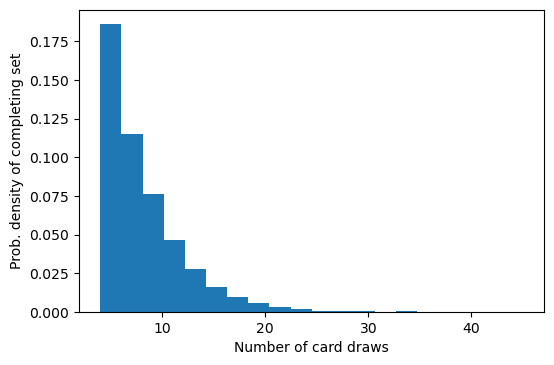

In [3]:
# Plotting histogram to see probability density distribution
iterations = Four_CouponCollect()
trials = 1e4
plt.hist(iterations, bins=int(trials*2e-3), density=True)
plt.xlabel("Number of card draws")
plt.ylabel("Prob. density of completing set")
plt.show()

### Average and standard deviation for 1 simulation

In [4]:
print("Mean number of card draws to complete 1 set is:", np.mean(iterations))

print("Standard deviation of this data is:", np.round(np.std(iterations), 4))

Mean number of card draws to complete 1 set is: 8.383
Standard deviation of this data is: 3.8698


### Running multiple times to get distribution of mean values

In [5]:
%%time
# Plotting histogram to see probability density distribution
runs = 10000
means = np.zeros(runs)
for i in range(runs):
    iterats = Four_CouponCollect()
    means[i] = np.mean(iterats)

Wall time: 13.8 s


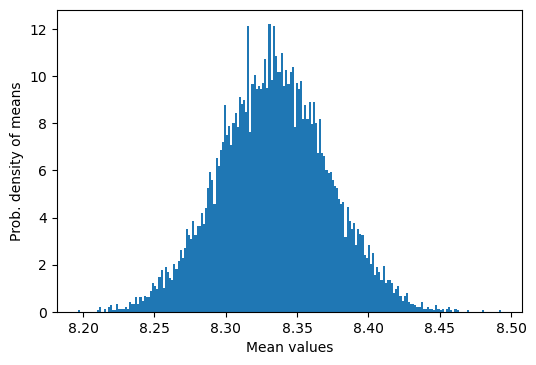

In [6]:
plt.hist(means, bins=int(runs*2e-2), density=True)
plt.xlabel("Mean values")
plt.ylabel("Prob. density of means")
plt.show()

In [7]:
print("The mean of this distribution of mean values, obtained from running 10000 runs of 10000 trials each, is:",
      np.round(np.mean(means),3))

print("We can see that this mean value checks out with the value mentioned in the paper shared, for N=4")

The mean of this distribution of mean values, obtained from running 10000 runs of 10000 trials each, is: 8.334
We can see that this mean value checks out with the value mentioned in the paper shared, for N=4


## Solving the general case (approach)

The above used method can definitely be extended to solve the more general case of having $N$ different kinds of coupons. We would need to have an array of counters (of length N) whose elements house the counter for each coupon. We can then divide the range of (0,1) into N "bins", and then increment counters of the corresponding coupons using the if conditions as done above. However, this particular approach may not be the best way to generalize this problem (to the N-coupon case). A different approach that doesn't necessarily use the technique of "binning" a randomly generated number from (0,1) can prove to be more efficient.

# Question 2: Random Walk

In [8]:
def Random_walk(L, N):

    '''
    Assign the initial positions of the particles on a regular lattice
    
    Parameters:
    -----------
    • L   : 2L + 1 is the side length of the lattice
    • N   : An integer number of steps taken by walker   
    Returns:
    --------
    The function returns one value:
    • inipos : A numpy array of (N x 2) elements storing the `x` and `y` coordinates of `N = Nx * Ny` particles.
    '''
    
    side_length = 2*L + 1
    
    n = side_length**2                              # Total number of particles in the lattice
    
    dx = side_length/N                                      # Spacing between particles along the  
    dy = Ly/Ny                                      # x and y axes
    
    inipos = np.zeros((n,2))                          # Empty array to store positions

    n=0                                             # Counter to count the number of particles
    
    for x in range(Nx):                             # Loop over all particles
        for y in range(Ny):
            inipos[n] = [dx/2 + dx*x, dy/2 + dy*y]    # Assign positions to each particle
            n+=1                                    # Increment counter
    
    r = np.zeros(shape=(n_steps, 2), dtype=np.int32)  # A 2D array of zeros to store the
                                                      # (x,y) coordinates of each of the N steps
    
    
    return inipos



In [9]:
@njit 
def randomwalk(N, L):

    '''
    A function produces a single random walk with a specific number of steps.

    Parameters:
    -----------
    • N : The number of steps in the random walk.
    • L : 2L + 1 is the side-length of the lattice
    

    Returns:
    --------
    The function returns one value:
    • r: An (N x 2) array containing each individual step of the random walk.
         Each step has 2 coordinates, i.e. (x,y).

    '''
    side = int(L*2 + 1) 
    
    # creating lattice of (2L+1)x(2L+1) dimensions
    r = np.zeros(shape=(side, 2), dtype=np.int32)  # A 2D array of length 2L+1 zeros to store the
                                                         # (x,y) coordinates of each of the N steps
    
    # starting off walker at (0,0)
    r[0][0] = 0   
    r[0][1] = 0
    
    # looping to fill in trajectory
    for i in range(1, N):
        num = np.random.uniform(0,1)        # choosing random number to decide direction of movement randomly
        
        if num < 0.25:                      # move rightwards
            r[i][0] = r[i-1][0] + 1         # increment x coordinate by 1
            r[i][1] = r[i-1][1]             # keep y coordinate same
            
        if num < 0.5 and num > 0.25:        # move upwards
            r[i][1] = r[i-1][1] + 1         # increment y coordinate by 1
            r[i][0] = r[i-1][0]             # keep x coordinate constant
            
        if num < 0.75 and num > 0.5:        # move leftwards                    
            r[i][0] = r[i-1][0] - 1         # decrement x coordinate by 1
            r[i][1] = r[i-1][1]             # keep y coordinate same
        
        if num > 0.75:                      # move downwards
            r[i][1] = r[i-1][1] - 1         # decrement y coordinate by 1
            r[i][0] = r[i-1][0]             # keep x coordinate same
        
    return r[:N]                                # Finally, return the history of this random walk (N steps)


In [10]:
%%time
n_steps = int(1e5)                      # Number of steps 
pos = randomwalk(n_steps, L=1.1*n_steps)      # simulating the random walk

Wall time: 461 ms


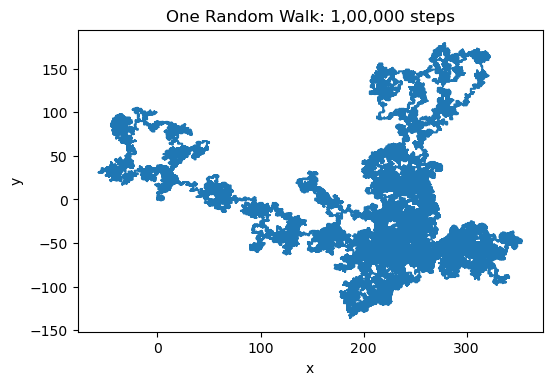

In [11]:
x = pos[:,0]   # x coordinates of random walker
y = pos[:,1]   # y coordinates of random walker

plt.plot(x,y)              # plotting the random walk
plt.title("One Random Walk: 1,00,000 steps")
plt.xlabel("x")
plt.ylabel('y')
plt.show()

### Simulating 100 random walks (of 100_000 steps each)

In [12]:
%%time
n_walks = 100
n_steps = 100_000
all_walks = np.zeros((n_walks, n_steps, 2))   # Array to store data of each walk

for i in range(n_walks):                      # For each walk,
    rw = randomwalk(n_steps, L=1.1*n_steps)           # Simulate a random walk ith required parameters
    all_walks[i] = rw                         # Store the simulated walk in `all_walks`


Wall time: 303 ms


### Plotting $\langle R^2 \rangle$ as a function of $N$ -

In [13]:
@njit
def get_Rsq(walk):

    '''
    A function to get R-squared values change over the evolution of a single random walk.

    Parameters:
    -----------
    • walk  : Position data of a single of random walk, as a 2D array of dimension (n_steps x 2).

    Returns:
    --------
    The function a single value:
    • Rsq  : 1D Array of same length as `walk`, with R-squared values at everu point between the
             start and the end of the walk.

    '''

    Rsq = np.zeros(len(walk))
    
    for i in range(len(walk)):  # looping over every step in the walk
        
         # Rsq[i] = (x[i]^2 - x[0]^2) + (y[i]^2 - y[0]^2) = x^2 + y^2 (if origin is (0,0))
            
        Rsq[i] = ((walk[i][0])**2 - (walk[0][0])**2) + ((walk[i][1])**2 - (walk[0][1])**2)

    return Rsq

### Finding and storing R-squared values for all 100 walks

In [14]:
all_Rsq = np.zeros((len(all_walks), len(all_walks[0])))  # Define array to store R-squared data for each walk


for i in range(len(all_Rsq)):             # looping over defined array
    all_Rsq[i] = get_Rsq(all_walks[i])    # storing corresponding R_sq values in array

### Plotting $\langle R^2 \rangle$ vs N

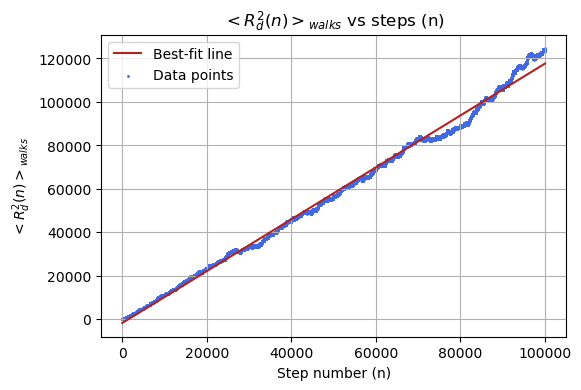

1.19401 -1838.0


In [15]:
avg_Rsq = np.zeros((len(all_Rsq[0])))     # creating array of zeros
          
avg_Rsq = np.mean(all_Rsq, axis=0)       # taking average of values over 1 column as 1 data point (10000 columns)

n = np.array([i for i in range(len(avg_Rsq))])      # generating x axis values array (1 to 10_000)

m,c = np.polyfit(n, avg_Rsq,1)

# Plotting to see relation
plt.scatter(n, avg_Rsq, s=1, color='royalblue', label="Data points")
plt.plot(n, m*n + c, label="Best-fit line", color='firebrick')
plt.legend()
plt.xlabel("Step number (n)")
plt.ylabel(r"$<R_d^2(n)>_{walks}$")
plt.title(r"$<R_d^2(n)>_{walks}$ vs steps (n)")
plt.grid()
plt.show()
print(np.round(m,5),np.round(c))

The above values of slope and intercept of the best fit line gives a clear relationship between $\langle R^2 \rangle$ and N, given approximately by -
$$  \langle R^2 \rangle \sim 1.1n $$

###  Finding probability distribution $P_N(R)$: Steps -

1) Find the end points of all 100 random walks, and take their integer parts (since we have a discrete lattice).

2) Create a (2L+1) x (2L+1) grid by generating 2L+1 discrete values for X and Y separately. These go from (-L to L).

3) Create a 2D empty array that will store probability distribution for X and Y separately. "Counts"

4) For the recorded (integer) end points of all 100 walks, fill in the corresponding element of the probability array by adding 1 to that element. 

5) After going through all the endpoints, divide the probability array (counts) by the total number of walks simulated (in this case, 100) to get the probability that a particular walk ends at a particular x, and a particular y, separately (we can do these independently for x and y since they are by definition, uncorrelated in a random walk). Plotting this 2D array in a meshgrid along with x&y surface plots thus gives us the required $P_N(R)$.

In [16]:
%%time
n_walks = 100_000
n_steps = 100
all_walks = np.zeros((n_walks, n_steps, 2))   # Array to store data of each walk

for i in range(n_walks):                      # For each walk,
    rw = randomwalk(n_steps, L=1.1*n_steps)           # Simulate a random walk ith required parameters
    all_walks[i] = rw                         # Store the simulated walk in `all_walks`


Wall time: 465 ms


In [17]:
L=1.1*n_steps
# Finding end_points of all walks and storing them
end_points = all_walks[:,-1]

# Creating grid of X and Y going from -L to +L (2L+1 values for each)
X=np.arange(-L,L+1)          
Y=np.arange(-L,L+1)

# Creating empty 2D array for storing probability distribution 
counts=np.zeros((len(X),len(Y)))

# Filling in the probability distribution array by incrementing its elements
for i in (end_points):
    counts[int(i[0])+110,int(i[1])+110]+=1
    
# Calculating actual probabilities 
probability=counts/n_walks


### Generating 2D surface plot

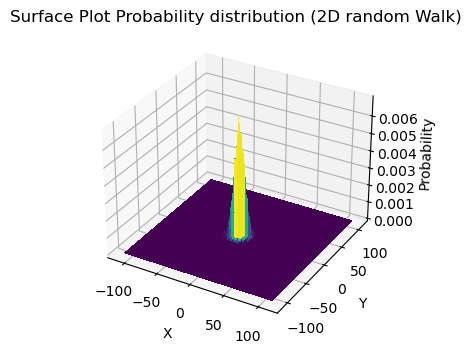

In [18]:
#%matplotlib tk     # uncomment to see interactive 2D plot (but will need to restart kernel everytime)

Two_X,Two_Y = np.meshgrid(X,Y)

fig,ax=plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(Two_X,Two_Y, probability, cmap="viridis",antialiased=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability')
ax.set_title('Surface Plot Probability distribution (2D random Walk)')
plt.show()

### Large Deviation Principle

Here, we want to take the limit of the given Rate function as $N \rightarrow \infty$. This is equivalent to taking the limit of $\frac{1}{N} \rightarrow 0$. However, the log function inside the Rate Function gives nan values for taking it exactly to 0. Thus, instead of exactly 0 we take an arbitrarily decided small value given by $\epsilon$. Here, I take $\epsilon = 10^{-10}$. This is equivalent to choosing $N = 10^{10}$

In [19]:
@njit

def I(probability, N):
    e=1e-10
    return -np.log(probability+e)/N


### Plotting $I$ vs $(x,y)$

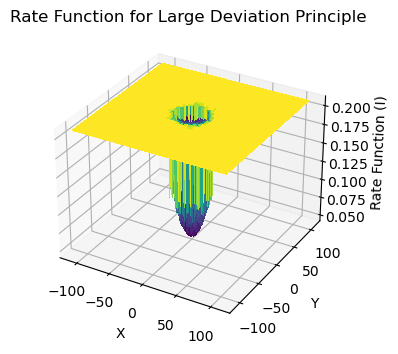

In [20]:
Ivalue = I(probability,L)

Two_X,Two_Y=np.meshgrid(X,Y)
fig_rate,ax_rate=plt.subplots(subplot_kw={"projection": "3d"})
ax_rate.plot_surface(Two_X, Two_Y, Ivalue, cmap="viridis", antialiased=False)

ax_rate.set_xlabel('X')
ax_rate.set_ylabel('Y')
ax_rate.set_zlabel('Rate Function (I)')
ax_rate.set_title('Rate Function for Large Deviation Principle')
plt.show()

# Question 3: Rumors - Jack and Jill

### Algorithm - 

1) Define an array with of length N. N is the number of people, and it will be filled with either 0s or 1s. At the start,  all N indices are set to 0, signifying nobody knows the rumor. 

2) Say the 0th element is Jack. Set it to 1. Choose a random index I from the remaining N-1 indices, and make its value 1. This signifies that person I knows the rumor.

3) Now, Person $I$ has $(N-2)$ options to choose from. Similarly Person $I+1$ has $(N-3)$ "valid" options to choose from. Thus, Person $I+P$ has $(N-P-2)$ "valid" options to choose from. By "valid" I mean choosing an option that won't end the chain. Of course, each of these people have $(N-2)$ total possible options to choose from (can't tell Jack + the person you heard it from). 

Thus, the probability of not ending the chain at the $(P+2)$th person (including Jack) is $$ \frac{N-P-2}{N-2} = 1 - \frac{P}{N-2} $$ 

We now write a function that calculates this probability using a Monte-Carlo-ish technique

In [21]:
@njit

def RumorJJ(N):                                    # asking for order of magnitude of N, along with N
    rumor = np.zeros(N)                                 # indices of this array are identifiers of people
    rumor[0] = 1                                        # setting Jack's index to 1
    
    p = 0                                           # initially, number of people who know is 0 (apart from Jack)
    prob = 1 - (p)/(N-2)                            # using expression for probability arrived at above
    num = np.random.uniform(0,1)                    # generating a first random number to enter the while loop

    while num < prob:                               # Using monte-carlo-ish technique
        num = np.random.uniform(0,1)
        p += 1                                   # if condition satisfied, increase number of people knowing the rumor by 1
        prob = 1 - (p)/(N-2)                     # update probability with new value of p
        
        
    # number of people in the end who know the rumor (after all iterations run till while MC condition is satisfied)
    return p+2 

### Finding probability that everyone hears the rumor (except for Jill)

In [22]:
# Finding for N = 5 (small values only, since intuitively, this probability dies out quickly with increasing N)

trials = 10_000
N = 5             

peeps_heard = np.zeros(trials)   # making an empty array for storing number of people who have heard rumor

for i in range(trials):               # updating the peeps_heard array
    peeps_heard[i] = RumorJJ(N)

    
# Finding probability by counting the number of elements of peeps_heard that are equal to N (everyone hearing the rumor)
# and dividing by the total number of elements of peeps_heard
    
prob = np.count_nonzero(peeps_heard == N)/trials           

print("Probability that everyone hears the rumor before stopping for N=5 is:", prob)

Probability that everyone hears the rumor before stopping for N=5 is: 0.2128


### Now finding variation of probability with $ N \in (3,15)$

In [23]:
N = np.array([ i for i in range(3,15)])

trials = 10_000
peeps_heard = np.zeros((len(N),trials), dtype =float)

for i in range(len(N)):
    for j in range(trials):
        peeps_heard[i][j] = RumorJJ(N[i])
    

probs = np.zeros(len(N), dtype=float)

for i in range(len(N)):
     probs[i] = np.sum(peeps_heard[i] == N[i])/trials



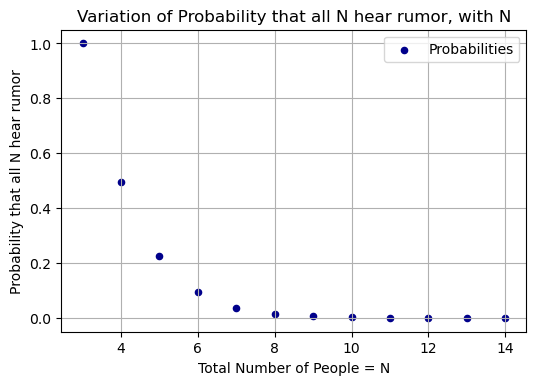

In [24]:
plt.scatter(N, probs, color='darkblue', s=20, label="Probabilities")
plt.xlabel("Total Number of People = N")
plt.ylabel("Probability that all N hear rumor")
plt.title("Variation of Probability that all N hear rumor, with N")
plt.legend()
plt.grid()
plt.show()

So from the above graph we can clearly see that the probability of all $N$ people hearing the rumor (before Jill knows) dies out fairly quickly with increasing N, becoming practically zero from around $N \sim 10$

#### log-log plot to check for power-law dependence

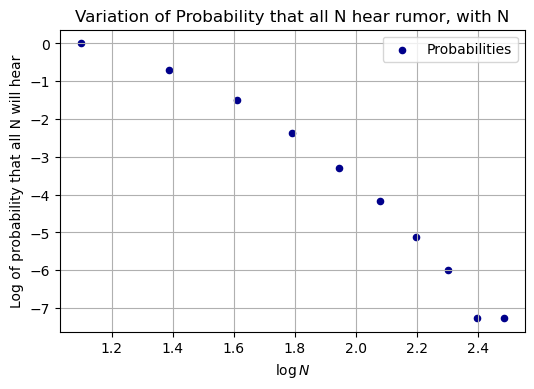

In [25]:
plt.scatter(np.log(N[:10]), np.log(probs[:10]), color='darkblue', s=20, label="Probabilities")
plt.xlabel(r"$\log{N}$")
plt.ylabel("Log of probability that all N will hear")
plt.title("Variation of Probability that all N hear rumor, with N")

plt.legend()
plt.grid()
plt.show()

Visually, since this log-log plot is not linear, we can posit that there's no clear power law dependence between the probability and N

### Finding average number of people who will hear rumor in N=50 people

In [26]:
# Finding for N = 50

trials = 10_000

peeps_heard = np.zeros(trials)

for i in range(trials):
    peeps_heard[i] = RumorJJ(50)
    
print(np.round(np.mean(peeps_heard), 4))


10.2949


Approximately 10 people will hear the rumor on average, in a group of 50 people

#### Varying N over a range now

In [27]:
%%time
N = np.array([ i for i in range(3,100)])

trials = 10_000

peeps_heard = np.zeros((len(N),trials), dtype =float)
means = np.zeros(len(N))

for i in range(len(N)):
    for j in range(trials):
        peeps_heard[i][j] = RumorJJ(N[i])
        means[i] = np.mean(peeps_heard[i])


Wall time: 12.4 s


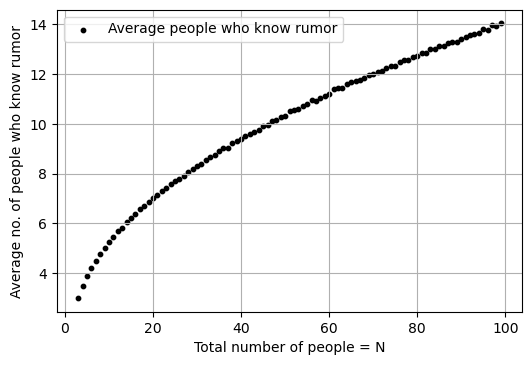

In [28]:
plt.scatter(N, means, s=10, label="Average people who know rumor", color='black')
plt.xlabel("Total number of people = N")
plt.ylabel("Average no. of people who know rumor")

plt.legend()
plt.grid()
plt.show()

### log-log plot for finding power-law (if any)

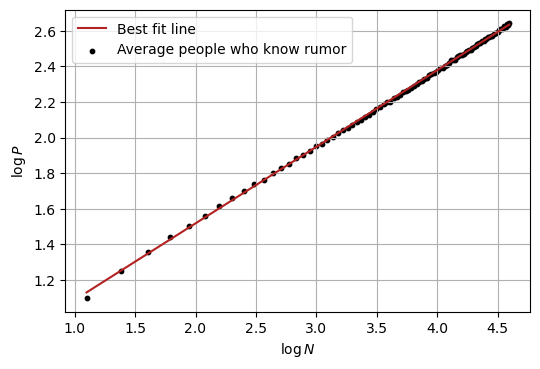

(Potential) Power law dependence from slope of best-fit line is: 0.4307


In [29]:
plt.scatter(np.log(N), np.log(means), s=10, label="Average people who know rumor", color='black')
plt.xlabel(r"$\log{N}$")
plt.ylabel(r"$\log{P}$")
m,c = np.polyfit(np.log(N), np.log(means), 1)
plt.plot(np.log(N), m*np.log(N) + c, color='firebrick', label="Best fit line")
plt.legend()
plt.grid()
plt.show()
print("(Potential) Power law dependence from slope of best-fit line is:", np.round(m,4))

# Question 4: Volume of a sphere - Monte Carlo

In [30]:
@njit
def Vd_dim_sphere(d, N):
    # number of points inside d-dimensional sphere (initially set to 0)
    inside = 0
    # empty array to fill in magnitudes of random points 
    magn_points = np.zeros(d)
    for i in range(N):   
        # these values are directly the magnitudes of the components in 'd' dimensions of a chosen point
        for j in range(d): 
            magn_points[j] = np.random.uniform(0,1)     # generating 'd' random numbers and storing them in an array
            
        # these 'd' random numbers are 'd' magnitudes of components in every direction. 
        # If the sum of their squares is < 1 (since _unit_ sphere),
        if np.sum(np.square(magn_points)) < 1:
            inside += 1           # then the point lies inside the sphere. Increase counter by 1
            
    # After generating N points and appropriately counting those that were inside the sphere,
    v = float(inside)/float(N)
    
    # Vol of complete `d' dimensional sphere is 2^d times the fraction of points landing inside the sphere i.e. v
    volume = v*(2**d)
    
    return volume
    


### Estimating value of $\pi$ as volume of 2-dimensional unit sphere

In [41]:
%%time

# Number of points generated = N
N = int(1e8)
# Number of dimensions = d
d = 2

# Estimating value of pi by calculating volume of 2 dimensional unit sphere
np.round(Vd_dim_sphere(d, N), 8)

Wall time: 12.6 s


3.1417446

In [32]:
%%time

# reducing N 
N = int(1e7)

# Array for number of dimensions
d = np.array([i for i in range(2,20)])

# Empty array to fill volumes of unit spheres in every dimension
Volumes = np.zeros(len(d))

# Filling in the volumes array by finding volume of unit sphere for every value of d
for i in range(len(d)):
    Volumes[i] = Vd_dim_sphere(d[i], N)


Wall time: 36.4 s


### Plotting variation of volume with dimensions

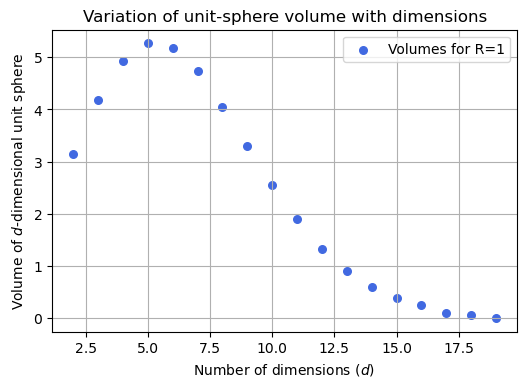

In [33]:
plt.scatter(d, Volumes, color='royalblue', label="Volumes for R=1", s=30)
plt.xlabel(r"Number of dimensions ($d$) ")
plt.ylabel(r"Volume of $d$-dimensional unit sphere")
plt.title("Variation of unit-sphere volume with dimensions")
plt.legend()
plt.grid()
plt.show()

In [34]:
print("The volumes of d-dimensional unit spheres for d = 2,3,4... 20 are: \n")
print(np.round(Volumes, 7))

The volumes of d-dimensional unit spheres for d = 2,3,4... 20 are: 

[3.14221   4.1900592 4.9355392 5.2666784 5.1740032 4.736192  4.050048
 3.29472   2.5470976 1.8905088 1.3312    0.897024  0.6012928 0.3801088
 0.2424832 0.0917504 0.0524288 0.       ]


## Estimating $V_{5.3}$ using Lagrange interpolation

In [35]:
def lagrange(x, y, d_new):
    """
    Finding the Lagrange polynomial through the points (x, y) and return its value at d = d_new.
    """
    # Check that the input arrays have the same length
    if len(x) != len(y):
        print("The x and y input array must have the same length.")

    # Initializing the lagrange polynomial
    lp = 0

    # Looping over the points
    for i in range(len(x)):
        # Getting the current point
        xi, yi = x[i], y[i]

        # Initializing the term
        term = yi

        # Looping over the other points
        for j in range(len(x)):
            # Skipping the current point
            if i == j:
                continue

            # Multiplying the term by the appropriate factor
            term *= (d_new - x[j]) / (xi - x[j])

        # Adding the term to the final lagrange polynomial built
        lp += term

    return lp

# Making input data point arrays for lagrange interpolation

x = np.array([4,5,6,7])
y = np.array([Volumes[3], Volumes[4], Volumes[5], Volumes[6]])
d_new = 5.3

print("The volume of the 5.3 dimensional unit sphere (interpolated using 4 data points) is:", 
      np.round(lagrange(x, y, d_new), 7))
print("The volume of the 5.3 dimensional unit sphere (interpolated using full data set) is:", 
      np.round(lagrange(d, Volumes, d_new), 7))


The volume of the 5.3 dimensional unit sphere (interpolated using 4 data points) is: 5.0744946
The volume of the 5.3 dimensional unit sphere (interpolated using full data set) is: 5.2613294


# Question 5: The Birthday Problem

### Algorithm finally being used - 
1) Make an array of numbers from 1 to 365 signifying birthdays throughout the year.

2) Choose n values randomly from this set. Since we can use only uniform deviation in (0,1), we do not use $\texttt{random.choice()}$ etc. Work around this by appropriately scaling and rounding numbers from uniform deviation (0,1) to achieve what $\texttt{random.choice()}$ does.

3) Once these n birthdays are randomly chosen, check for any repeats in these values. If there is a repeat, increase counter by 1. Do this for as many iterations as possible/convenient.

4) The probability of at least 2 people having concurrent birthdates would be given by the counter value at the end of all iterations, divided by the total number of iterations. Return this value.

In [36]:
@njit
def bdayparadox(n, iterations):
    ctr = 0
    bdays = np.array([ i for i in range(1,366)])
    # To avoid using np.random.choice(bdays, n) directly, we implement the
    # following technique to get the same results from np.random.uniform()
    chosen_bdays = np.zeros(n)
    for i in range(iterations):
        for j in range(n):
            a = np.round(np.random.uniform(0,1),3)
            chosen_bdays[j] = int(a*366)
        # detecting repeated birthdates
        unique_bdays = set(chosen_bdays)
        if len(chosen_bdays) - len(unique_bdays) > 0:
            ctr += 1
            
    prob = float(ctr/iterations)
    return prob



### Verying the birthday paradox (checking probability for 23 people)

In [37]:
%%time
np.round(bdayparadox(23, 1e5), 5)

Wall time: 1.15 s


0.51665

So, it works. Now onto seeing the probability variation with N, as well as different number of iterations

In [38]:
%%time
ns = np.array([ i for i in range(101)])
iterations = np.array([10**i for i in range(1,6)])

probs = np.zeros((len(iterations), len(ns)))
len(probs[0])
for i in range(len(iterations)):
    for j in range(len(ns)):
        probs[i][j] = bdayparadox(ns[j], int(iterations[i]))

Wall time: 31.8 s


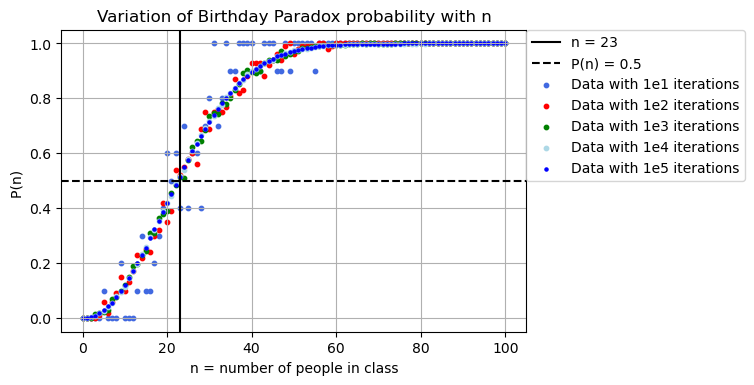

In [39]:
# Improve the color coordination of this please

plt.scatter(ns, probs[0], s=10, color='royalblue', label='Data with 1e1 iterations')
plt.scatter(ns, probs[1], s=10, color='red', label='Data with 1e2 iterations')
plt.scatter(ns, probs[2], s=10, color='green', label='Data with 1e3 iterations')
plt.scatter(ns, probs[3], s=10, color='lightblue', label='Data with 1e4 iterations')
plt.scatter(ns, probs[4], s=5, color='blue', label='Data with 1e5 iterations')

plt.xlabel("n = number of people in class")
plt.axvline(23, color='black', label="n = 23")
plt.axhline(0.5, color='black', label="P(n) = 0.5", linestyle='--')
plt.title("Variation of Birthday Paradox probability with n")
plt.ylabel('P(n) ')
plt.legend(loc=(1,0.5))
plt.grid()
plt.show()

Thus we can see that the probability of at least 2 people sharing a birthday amongst a set of randomly chosen $n$ people goes to 1 at around $n \sim 65$. It is around 50% for 23 people, as is conventionally known as "The Birthday Paradox". We also see that the curve becomes much cleaner as the number of iterations increase, as is expected.

### One of my other attempts (not necessarily for grading)

### Nevermind, here's a different algorithm

1) Generate a large qty of random numbers, say 10_000. Acshully, let this be 1000*n. Set counter to 0

2) Divide them into groups of n members each. Thus, each group will have 10_000/n members

3) Check for shared birthdays separately in these subgroups, using the pairing technique.

4) For every group that has a match, increase counter by 1

5) Calculate percentage of groups that had a match (so counter/total number of groups) x 100. 

In [40]:
#@njit
def Prob2(n):
    N = 100*n
    samples = np.zeros((int(N/n), n), dtype=float)               # 1000 rows of n birthdates each
    for i in range(len(samples)):
        samples[i] = np.random.uniform(0, 1, size=n)      # filling n random numbers in each of the 1000 rows
        
    # checking for concurrent birthdays in every row separately
    # making an empty array which will store 1 or 0 for each group of 'n' people; 1 if there's a match, 0 if there isn't
    counter = np.zeros(len(samples))
    binsize = 1/365  # defining what a coincident birthday is
    
    for i in range(len(samples)):              # accessing ith row of samples (ith group of n birthdates)
    
        for p in range(len(samples[i]) - 1):   # for every birthdate in the ith row
            for q in range(p+1, len(samples[i])):    # comparing it pair-wise with every other birthdate in that same row
                
                while counter[i] < 1:              # till the time a single concurrent birthdate is not found
                    
                    if np.abs(samples[i][p] - samples[i][q]) < binsize: # if numbers are close enough (given by binsize)
                        counter[i] += 1               # then the birthdates coincide. Increase counter by 1
    
    count = np.count_nonzero(counter)
    
    return count
    